In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#import dataset
cars = pd.read_csv("mtcars.csv")

In [3]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
cars.shape

(32, 12)

In [6]:
#summary statistics
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
#drop duplicate rows if any
cars = cars.drop_duplicates(keep='first')

(array([2., 4., 6., 6., 5., 3., 1., 1., 2., 2.]),
 array([10.4 , 12.75, 15.1 , 17.45, 19.8 , 22.15, 24.5 , 26.85, 29.2 ,
        31.55, 33.9 ]),
 <a list of 10 Patch objects>)

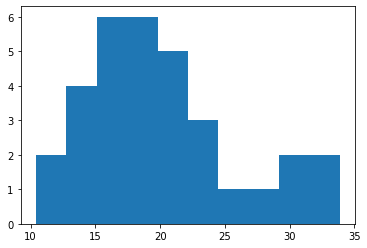

In [8]:
#hist. of continous numerical data
num_bins=10
plt.hist(cars['mpg'], num_bins)

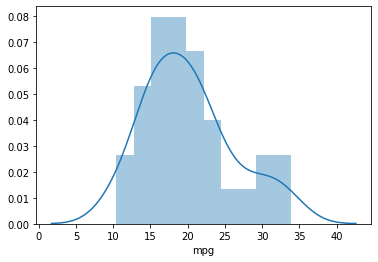

In [9]:
sns.distplot(cars['mpg'], 10)
plt.show()

(array([6., 6., 4., 1., 1., 5., 3., 2., 1., 3.]),
 array([ 71.1 , 111.19, 151.28, 191.37, 231.46, 271.55, 311.64, 351.73,
        391.82, 431.91, 472.  ]),
 <a list of 10 Patch objects>)

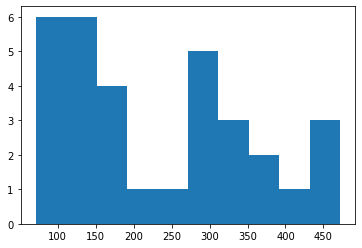

In [10]:
plt.hist(cars['disp'], 10)

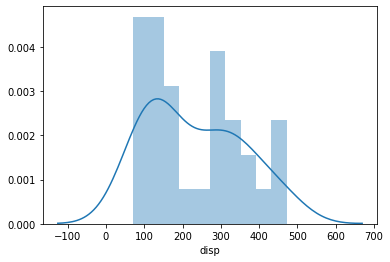

In [12]:
 sns.distplot(cars['disp'], 10)

In [13]:
#count of category variable by category-cross tabulate
model_dist = cars.groupby('model').size()

In [14]:
model_dist.head()

model
AMC Javelin           1
Cadillac Fleetwood    1
Camaro Z28            1
Chrysler Imperial     1
Datsun 710            1
dtype: int64

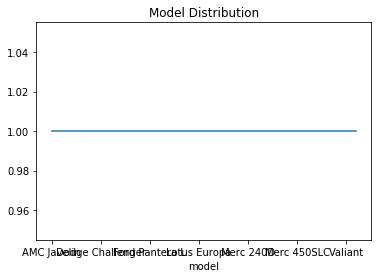

In [15]:
#dDistribution of categorical variable
model_dist.plot(title='Model Distribution')

In [18]:
#select all numerical veriable
cars_num = cars.select_dtypes(include=['float64', 'int64'])

In [19]:
cars_num.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F1028CFC8>,
      dtype=object)

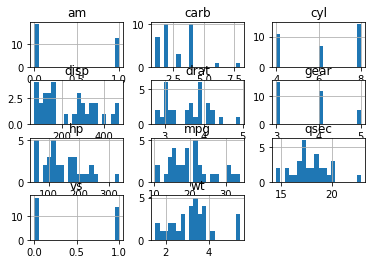

In [24]:
cars_num.hist(bins=20)

In [25]:
#correlation with the variable of interest
cars_corr = cars_num.corr()['mpg'][:- 1]

In [26]:
cars_corr

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
Name: mpg, dtype: float64

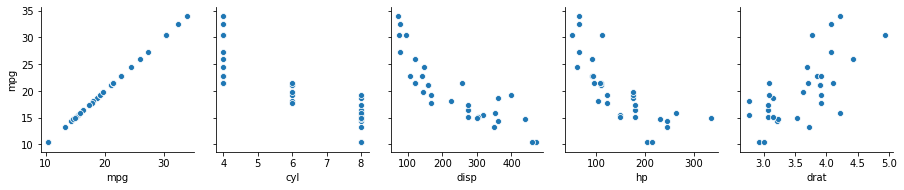

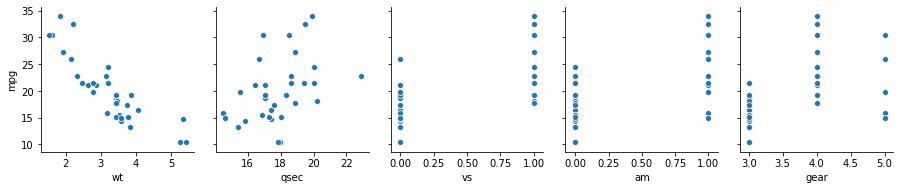

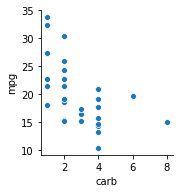

In [28]:
#correlation plot using pairplot
for i in range(0, len(cars_num.columns), 5):
    sns.pairplot(cars_num, y_vars=['mpg'], x_vars=cars_num.columns[i:i+5])

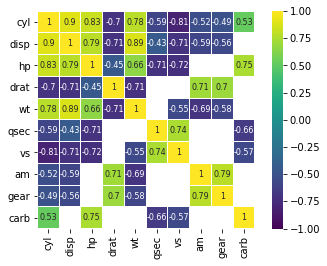

In [30]:
#plotting significant correlation in one plot (heatmap)
corr = cars_num.drop('mpg', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidth=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


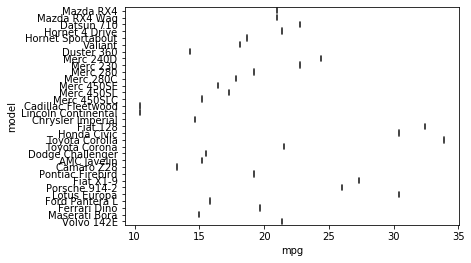

In [34]:
#box-plot (categorical variable)
box1 = sns.boxplot(x='mpg', y='model', data=cars)

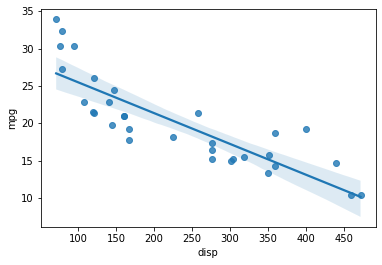

In [35]:
#regression plot
sns.regplot(cars['disp'], cars['mpg'])